In [49]:
import pycaret
import pandas as pd

In [50]:
# อ่านไฟล์ CSV
data = pd.read_csv('export_data/filtered_data_3_best.csv')

In [51]:
# ตั้ง 'timestamp' เป็น index หากยังไม่ได้ทำ
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ตั้งค่า freq ให้กับ index
data = data.asfreq('D')  # 'D' สำหรับรายวัน

In [56]:
# แสดงแถวที่มีค่าหายไปก่อนเติม
print("แถวที่มีค่าหายไปก่อนเติม:")
print(data[data.isnull().any(axis=1)])

# เติมค่าที่หายไปด้วยการ interpolate แบบเส้นตรง
data.interpolate(method='linear', inplace=True)

# แสดงแถวที่ยังมีค่า NaN หลังจากเติม (ถ้ามี)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("แถวที่ยังมีค่าหายไปหลังเติม:")
    print(missing_rows_after)
else:
    print("ไม่มีค่าหายไปแล้ว")

row = data.loc["2023-09-30 07:00:00"]
row

แถวที่มีค่าหายไปก่อนเติม:
Empty DataFrame
Columns: [humidity, pm_10, pm_2_5, pm_2_5_sp, temperature]
Index: []
ไม่มีค่าหายไปแล้ว


humidity       82.889367
pm_10          60.525519
pm_2_5         53.415241
pm_2_5_sp      69.527667
temperature    29.219760
Name: 2023-09-30 07:00:00, dtype: float64

<Axes: xlabel='timestamp'>

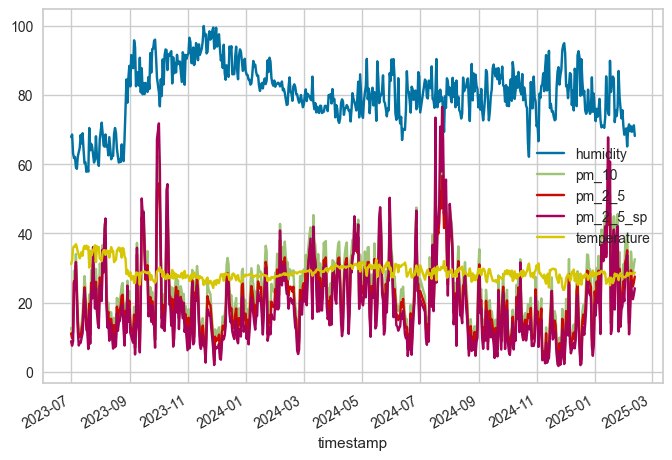

In [57]:
data.plot()

In [ ]:
from pycaret.time_series import *
# ตั้งค่าของ PyCaret
s = setup(data=data, target='pm_2_5', fh=7, session_id=123)

,Description,Value
0,session_id,123
1,Target,pm_2_5
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(592, 5)"
5,Transformed data shape,"(592, 5)"
6,Transformed train set shape,"(585, 5)"
7,Transformed test set shape,"(7, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [59]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0616,0.0526,0.4270,0.4869,0.0161,0.0162,0.9968,0.1033
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.0685,0.0677,0.4747,0.6255,0.0179,0.0177,0.9936,0.0633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0726,0.0634,0.5031,0.5866,0.0188,0.0187,0.9942,0.0533
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0726,0.0634,0.5033,0.5867,0.0188,0.0187,0.9942,0.0600
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0727,0.0634,0.5037,0.5871,0.0188,0.0187,0.9942,0.0533
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0746,0.0669,0.5163,0.6187,0.0210,0.0213,0.9946,0.1333
auto_arima,Auto ARIMA,0.0763,0.0673,0.5288,0.6221,0.0210,0.0207,0.9941,4.1167
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0765,0.0667,0.5291,0.6155,0.0209,0.0213,0.9952,0.1433
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.0914,0.0764,0.6329,0.7056,0.0265,0.0269,0.9936,0.0600
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0931,0.0857,0.6443,0.7914,0.0259,0.0264,0.9917,0.0867


d:\Normal File\Coder\MINI_PROJECT_1-2\pycaret_venv\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:713: UserWarning: Unsupported estimator `ensemble_forecaster` for method `compare_models()`, removing from model_library
  warnings.warn(
d:\Normal File\Coder\MINI_PROJECT_1-2\pycaret_venv\Lib\site-packages\pycaret\time_series\forecasting\oop.py:2694: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results = pd.concat((model_results, model_avgs), axis=0)
d:\Normal File\Coder\MINI_PROJECT_1-2\pycaret_venv\Lib\site-packages\pycaret\time_series\forecasting\oop.py:2694: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclu

In [46]:
predict_model(best)

,y_pred
2025-02-05,28.382
2025-02-06,28.382
2025-02-07,28.382
2025-02-08,28.382
2025-02-09,28.382
2025-02-10,28.382
2025-02-11,28.382


In [13]:
best = create_model('auto_arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-10-14,0.0146,0.0147,0.1005,0.1357,0.0099,0.0100,0.9993
1,2024-11-13,0.0220,0.0227,0.1489,0.2056,0.0137,0.0136,0.9990
2,2024-12-13,0.0363,0.0371,0.2457,0.3356,0.0152,0.0150,0.9989
Mean,NaT,0.0243,0.0248,0.1651,0.2256,0.0130,0.0129,0.9991
SD,NaT,0.0090,0.0093,0.0604,0.0828,0.0023,0.0021,0.0002


d:\Normal File\Coder\MINI_PROJECT_1-2\pycaret_venv\Lib\site-packages\pycaret\time_series\forecasting\oop.py:2694: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results = pd.concat((model_results, model_avgs), axis=0)


In [22]:
exog_cols = ['temperature', 'humidity', 'pm_10']

In [47]:
final_best = finalize_model(best)

In [48]:
predict_model(final_best, fh=30)

,y_pred
2025-02-12,26.3597
2025-02-13,26.3597
2025-02-14,26.3597
2025-02-15,26.3597
2025-02-16,26.3597
2025-02-17,26.3597
2025-02-18,26.3597
2025-02-19,26.3597
2025-02-20,26.3597
2025-02-21,26.3597
